> Welcome to my data analysis project ,I HOPE YOU FIND IT USEFUL and easy to understand...

# Project: No-show appointments Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


Welcome to my project :
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

**Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.**


### Question(s) for Analysis
We are going to find out What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment.

The questions we are gonna ask to ansower this total question are:

Q1:Compare who showed up and who did not to the gender.

Q2:Compare who showed up and who did not to the age.

Q3:Compare who showed up and who did not to the neighbourhood.

Q4:Compare who showed up and who did not to the scholarship.

Q5:Compare who showed up and who did not to the hypertension.

Q6:Compare who showed up and who did not to the diabetes.

Q7:Compare who showed up and who did not to the alcoholism.

Q8:Compare who showed up and who did not to receiving a sms.


In [1]:
#import important packages:)

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.8MB/s ta 0:00:011  4% |█▍                              | 460kB 25.0MB/s eta 0:00:01    29% |█████████▋                      | 3.1MB 27.7MB/s eta 0:00:01    43% |█████████████▊                  | 4.5MB 23.9MB/s eta 0:00:01    49% |███████████████▊                | 5.1MB 27.9MB/s eta 0:00:01    61% |███████████████████▊            | 6.4MB 12.2MB/s eta 0:00:01    92% |█████████████████████████████▋  | 9.7MB 14.5MB/s eta 0:00:01    99% |███████████████████████████████▉| 10.4MB 29.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01   13% |████▌                           | 1.9MB 18.3MB/s eta 0:00:01    19% |██████▏                         | 2.6MB 13.8MB/s eta 0:00:01    40% |█████████████                   | 5.4MB 18.3MB/s eta 0:00:01    50% |████████████████▏               | 6.8MB 26.9MB/s eta 0:00:01    83% |██████████████████████████▋     | 11.2MB 26.6MB/s eta 0:00:01    92% |████████████████████████

<a id='wrangling'></a>
## Data Wrangling

> Start to wrangle our data to be easier to deal with , more handy ,and more useful in analysing .So lets start



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.columns = [x.lower() for x in df.columns] #make all columns in lowercase
df.head() #seeing a sample of the data:

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info() #find out some information about the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape #find out the shape of the data

(110527, 14)

In [5]:
#renaming noshow column with approperiate name
df.rename(columns={'no-show': 'no_show'}, inplace=True)

In [6]:
df.rename(columns = {'hipertension':'hypertension','handcap':'handicap'},inplace=True) #renaming some columns names

In [7]:
#check columns names
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [8]:
#counting duplicated rows
df.duplicated().sum()

0

In [9]:
#counting null values in the data
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
dtype: int64

Now we made sure that our data has no duplicates or null values and have approperiate columns labels...


### Data Cleaning
>  Now we are going to remove any unuseful data from our dataframe 
 

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#drop useless columns
df.drop(columns = ['patientid','appointmentid','scheduledday','appointmentday'],inplace=True)



In [11]:
df.head() #see the first five rows of the data frame

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.describe() #show up some facts about the data

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The total number of patients is 110527.

Ther is some wrong values in the age columns like '-1' which is not possibe.

Maximum age is 115 yearsold.

The mean of ages is 37 yearsold.

In [13]:
df[df['age'] == -1] #identifying the wrong date row

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df.drop([99832], axis=0) #drop the wrong age row

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


 Now our data is all good to go for analysing so lets move up!!!

<a id='eda'></a>
## Exploratory Data Analysis



A big picture view for the data


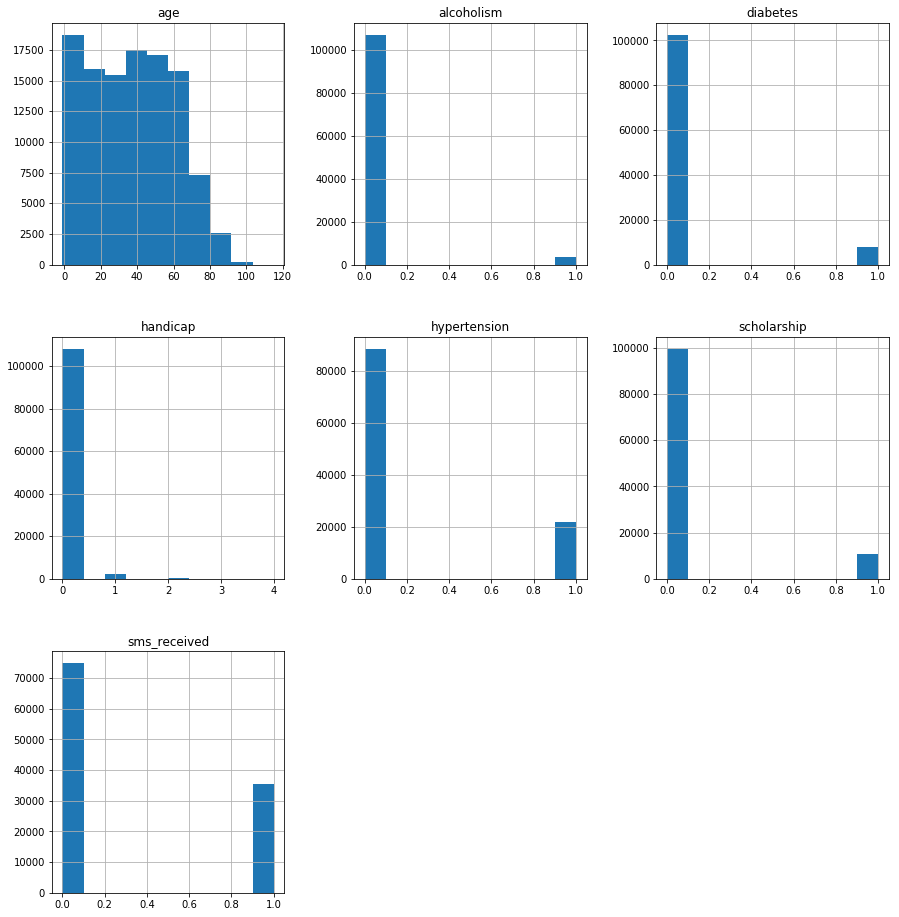

In [15]:
df.hist(figsize = (15,16)); #plotting the columns of the data 

The majority of the patient didn't suffer from alcoholism , diabetes or handicap and about 25% had hypertention.

Surprisingly the number of patients who didn't recieve an sms is twice as those who did!!!

we notice that the ages less than 10y are more likely to attend followed by the ages between 30 to 70 and the least group is in the range of more than 80y.

In [16]:
noshow = df['no_show'] == 'No' #DIDNT GO 
show = df['no_show'] == 'Yes' # WENT


In [17]:
df[noshow].count()['age'] #number of people who didn't go to the clinic

88208

In [18]:
df[show].count()['age'] #umber ofpeople who went to the clinic

22319

### Analysing other charactaresics 

# Q1:Compare who showed up and who did not to the gender

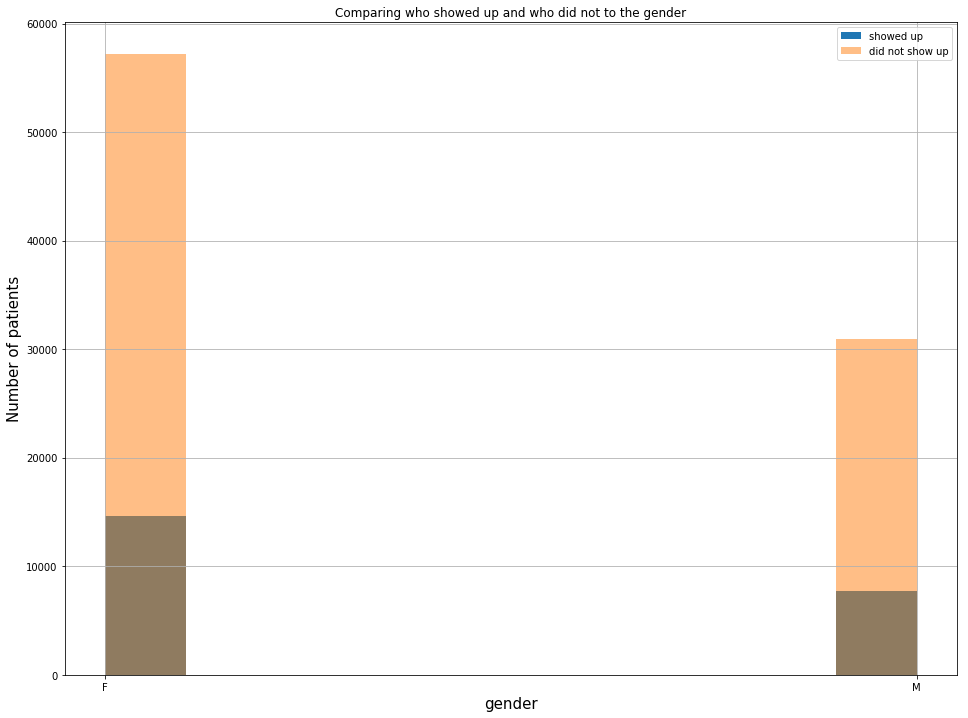

In [19]:
#Comparing who showed up and who did not to the gender

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.gender[show].hist(alpha = 1, label = 'showed up')  #make up the plot for the showed patients
df.gender[noshow].hist(alpha = 0.5, label = 'did not show up') #making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the gender') #making some labels
plt.xlabel('gender',size =15) #assign label for x axis
plt.ylabel('Number of patients', size = 15) #assign label for y axis
plt.legend(); #show the plot

# Q2:Compare who showed up and who did not to the age

Both males and females almost have the same percetage of who showd and who did't but the total number of males is greater than the females in both cases.

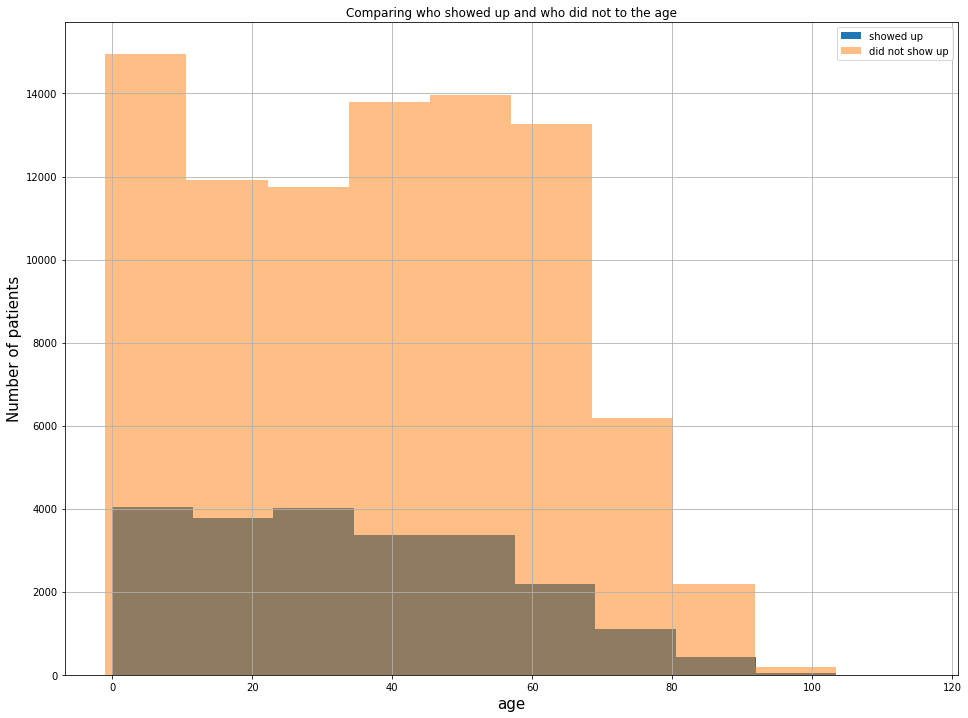

In [20]:
#Comparing who showed up and who did not to the age

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.age[show].hist(alpha = 1, label = 'showed up')#make up the plot for the showed patients
df.age[noshow].hist(alpha = 0.5, label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the age')#making some labels
plt.xlabel('age',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

We see that the older people get the less thy tend to get an appointment and the less they tend to attend it.

In [21]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Q3:Compare who showed up and who did not to the neighbourhood

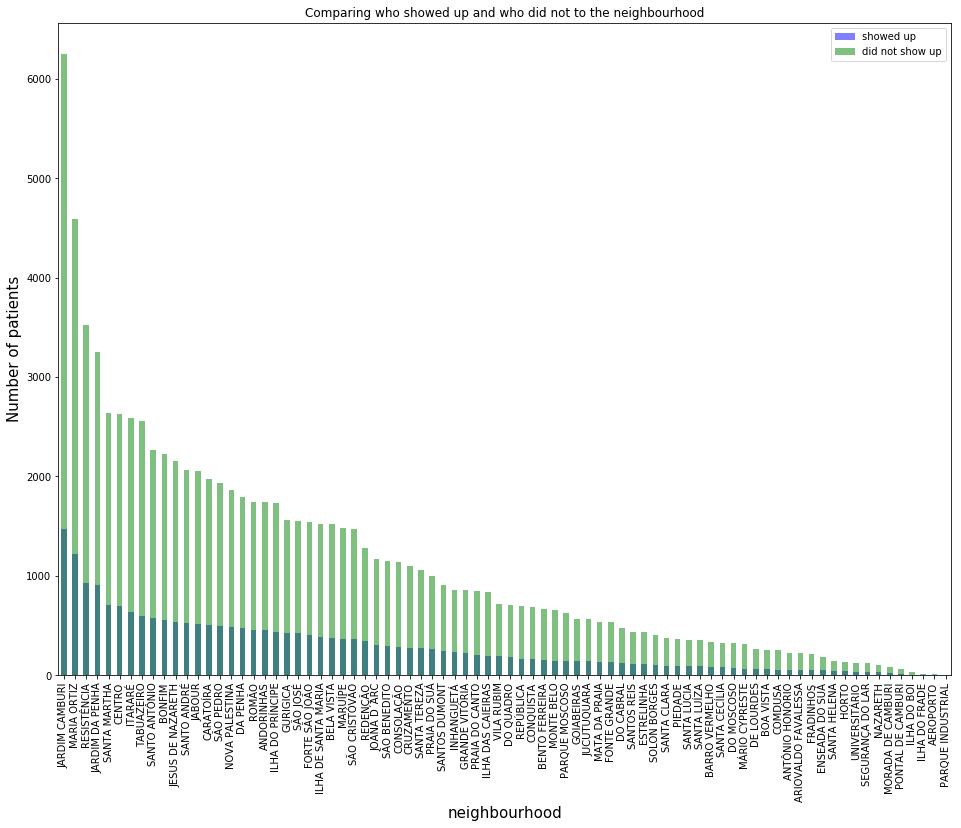

In [22]:
#Comparing who showed up and who did not to the neighbourhood
plt.figure(figsize=(16,12)) #setting up the size of the plot
df.neighbourhood[show].value_counts().plot(kind='bar',alpha = 0.5,color='blue',label = 'showed up')#make up the plot for the showed patients
df.neighbourhood[noshow].value_counts().plot(kind='bar', alpha = 0.5,color='green',label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the neighbourhood')#making some labels
plt.xlabel('neighbourhood',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

We here notice that there is some neighbourhoods that have a very high part of patients 'JARDIM CAMBURI'and 'MARIA ORTIZ' copared to another that almost have none of them 

# Q4:Compare who showed up and who did not to the scholarship

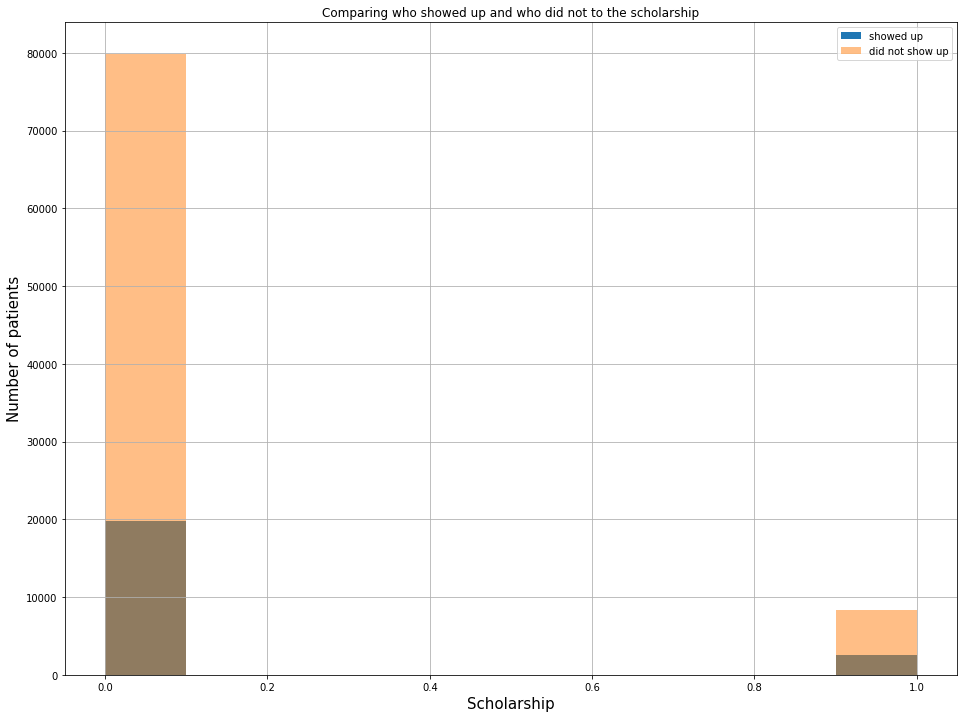

In [23]:
#Comparing who showed up and who did not to the scholarship

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.scholarship[show].hist(alpha = 1, label = 'showed up')#make up the plot for the showed patients
df.scholarship[noshow].hist(alpha = 0.5, label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the scholarship')#making some labels
plt.xlabel('Scholarship',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

No obvious relations between them.

# Q5:Compare who showed up and who did not to the hypertension

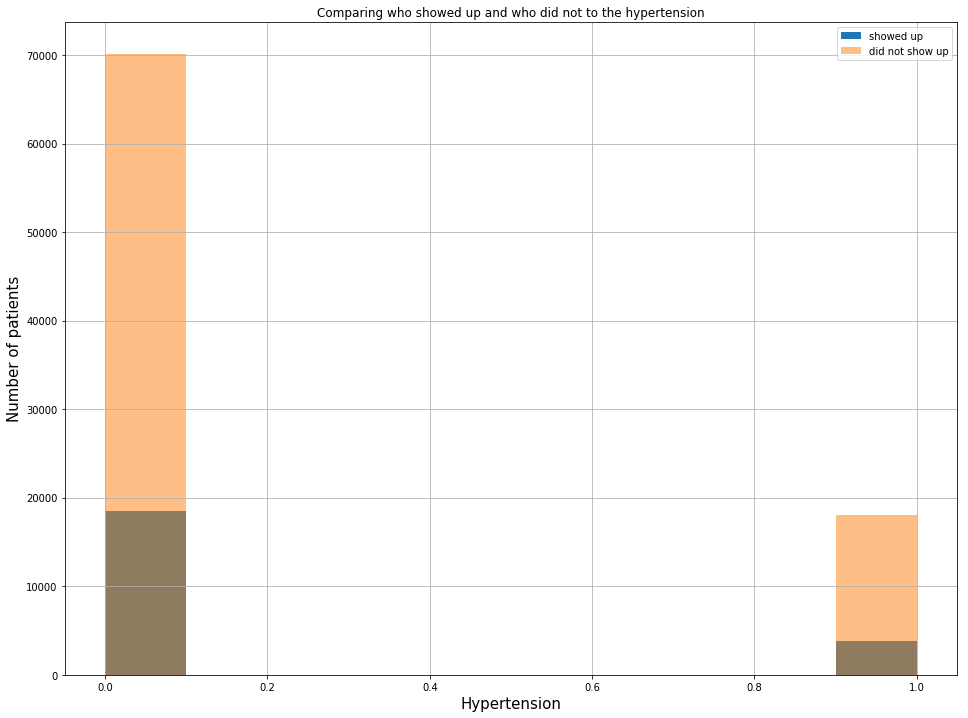

In [24]:
#Comparing who showed up and who did not to the hypertension

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.hypertension[show].hist(alpha = 1, label = 'showed up')#make up the plot for the showed patients
df.hypertension[noshow].hist(alpha = 0.5, label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the hypertension')#making some labels
plt.xlabel('Hypertension',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

No obvious relations between them.

# Q6:Compare who showed up and who did not to the diabetes

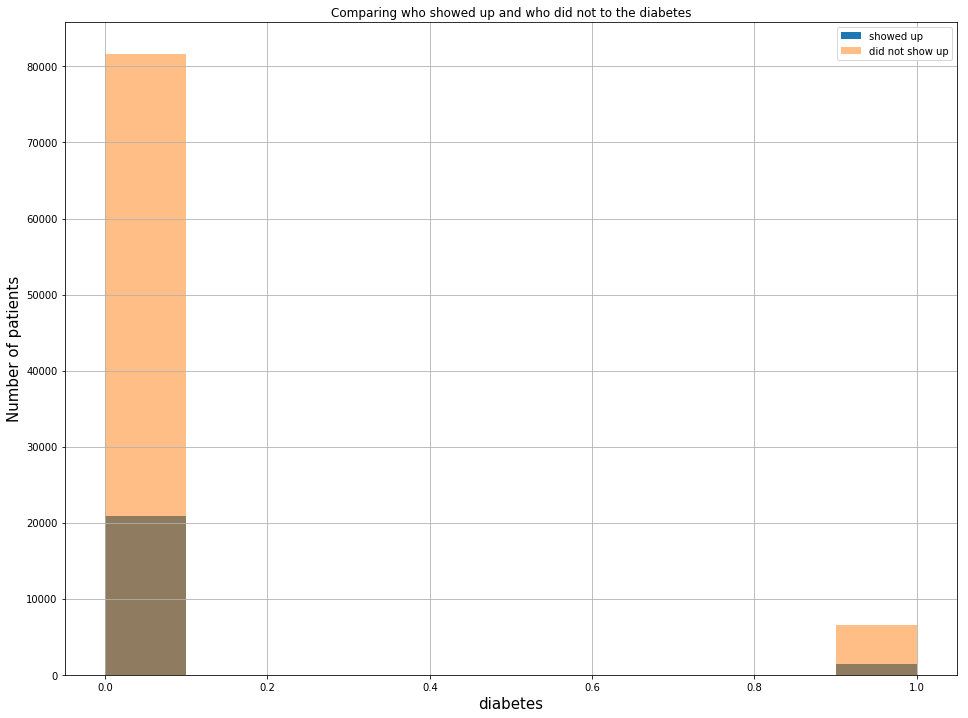

In [25]:
#Comparing who showed up and who did not to the diabetes

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.diabetes[show].hist(alpha = 1, label = 'showed up')#make up the plot for the showed patients
df.diabetes[noshow].hist(alpha = 0.5, label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the diabetes')#making some labels
plt.xlabel('diabetes',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

No obvious relations between them.

# Q7:Compare who showed up and who did not to the alcoholism

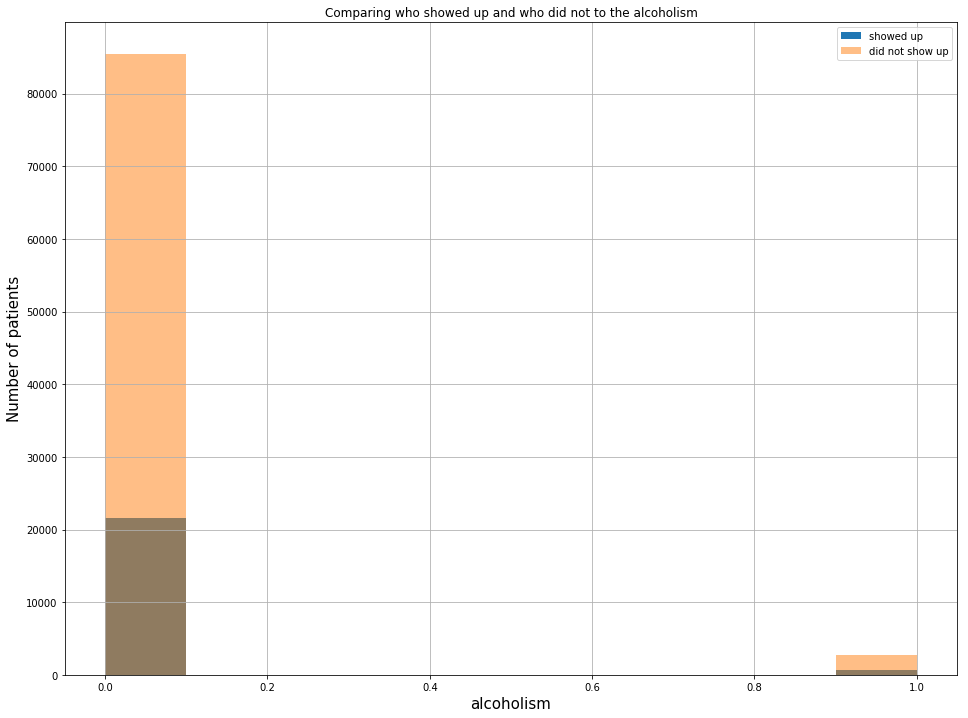

In [26]:
#Comparing who showed up and who did not to the alcoholism

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.alcoholism[show].hist(alpha = 1, label = 'showed up')#make up the plot for the showed patients
df.alcoholism[noshow].hist(alpha = 0.5, label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to the alcoholism')#making some labels
plt.xlabel('alcoholism',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

No obvious relations between them.

# Q8:Compare who showed up and who did not to receiving a sms

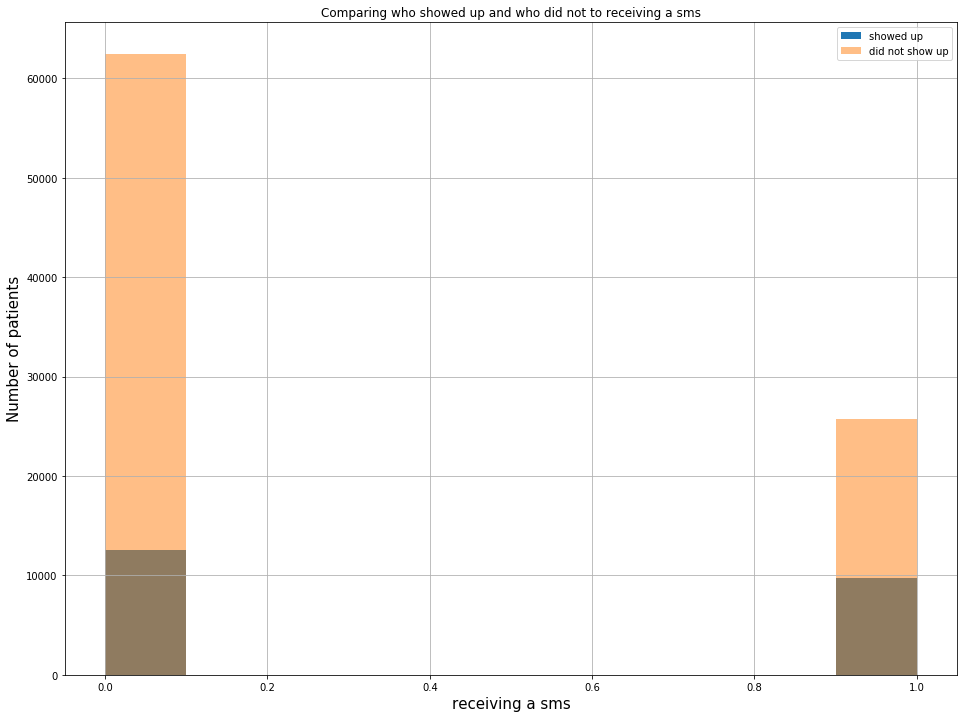

In [27]:
#Comparing who showed up and who did not to receiving a sms

plt.figure(figsize=(16,12)) #setting up the size of the plot
df.sms_received[show].hist(alpha = 1, label = 'showed up')#make up the plot for the showed patients
df.sms_received[noshow].hist(alpha = 0.5, label = 'did not show up')#making the plot for the patients that didn't show up
plt.title('Comparing who showed up and who did not to receiving a sms')#making some labels
plt.xlabel('receiving a sms',size =15)#assign label for x axis
plt.ylabel('Number of patients', size = 15)#assign label for y axis
plt.legend();

Surprisingly the number of patients who didn't recieve an sms is almost twice as those who did!!!


In [28]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='conclusions'></a>
## Conclusions

> There is an obvious correlation between patients showing up and the neighbourhood.There is some neighbourhoods that have a very high part of patients 'JARDIM CAMBURI'and 'MARIA ORTIZ' copared to another that almost have none of them.

> Surprisingly the number of patients who didn't recieve an sms is almost twice as those who did!!!

> We see that the older people become the less thy tend to get an appointment and to attend it.



### Limitations
> I couldn't make any useful informations between patients showing and not showing up and many other characterestics like diabetes ,chronic and gender and even more! 

>If the patients smoking or not and iformation about that .



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0